<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana4/Teorema_del_limite_central_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## Definición de funciones

In [2]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

In [3]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''  
  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [4]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas 
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes 
  
  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [5]:
def cuenta_vocales(texto):
  vocales ='aeiou'
  tot_vocales= 0
  for caracter in texto:
    if caracter in vocales:
      tot_vocales += 1
  return tot_vocales

In [6]:
def cuenta_caracteres_antes_de_n(texto):
  caracteres_antes = 0
  for caracter in texto:
    if caracter == 'n':
      break
    caracteres_antes += 1

  return caracteres_antes

# Distribución gaussiana

## Obtener muestras

a partir de la [distribución de la altura de trabajadores industriales de sexo masculino en Guadalajara](https://www.researchgate.net/publication/31722433_Dimensiones_antropometricas_de_la_poblacion_latinoamericana_Mexico_Cuba_Colombia_Chile_R_Avila_Chaurand_LR_Prado_Leon_EL_Gonzalez_Munoz)

In [7]:
mu, sigma = 1675, 62.8     # dimensiones en milimetros

n = 100 # tamaño de la muestra
m = 5000 # número de muestras

muestras = {'muestra '+str(i):np.random.normal(mu, sigma, n) for i in  range(1, m+1)}
muestras_alturas_hombres = pd.DataFrame(muestras)

muestras_alturas_hombres

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,muestra 11,muestra 12,muestra 13,muestra 14,muestra 15,muestra 16,muestra 17,muestra 18,muestra 19,muestra 20,muestra 21,muestra 22,muestra 23,muestra 24,muestra 25,muestra 26,muestra 27,muestra 28,muestra 29,muestra 30,muestra 31,muestra 32,muestra 33,muestra 34,muestra 35,muestra 36,muestra 37,muestra 38,muestra 39,muestra 40,...,muestra 4961,muestra 4962,muestra 4963,muestra 4964,muestra 4965,muestra 4966,muestra 4967,muestra 4968,muestra 4969,muestra 4970,muestra 4971,muestra 4972,muestra 4973,muestra 4974,muestra 4975,muestra 4976,muestra 4977,muestra 4978,muestra 4979,muestra 4980,muestra 4981,muestra 4982,muestra 4983,muestra 4984,muestra 4985,muestra 4986,muestra 4987,muestra 4988,muestra 4989,muestra 4990,muestra 4991,muestra 4992,muestra 4993,muestra 4994,muestra 4995,muestra 4996,muestra 4997,muestra 4998,muestra 4999,muestra 5000
0,1630.736360,1676.487382,1748.289053,1747.922225,1700.657333,1639.876131,1624.124633,1685.645530,1664.350365,1607.216144,1641.545434,1726.231715,1599.157511,1571.513450,1721.446556,1645.750465,1616.833853,1826.927218,1699.459614,1641.580154,1684.388034,1598.767782,1650.901370,1680.053178,1579.900679,1686.072778,1715.323494,1580.384465,1850.052944,1713.075974,1628.792588,1707.955934,1725.826822,1638.646381,1639.595792,1847.044201,1634.933836,1783.040158,1592.110047,1716.933687,...,1724.684063,1756.350199,1714.642220,1581.483647,1742.880116,1650.053470,1657.685282,1700.724988,1658.584478,1749.299209,1676.561807,1624.216658,1613.006681,1701.209795,1713.482494,1684.069934,1662.249591,1620.627596,1607.146858,1823.877215,1596.663521,1712.147896,1613.865954,1607.080989,1699.296395,1702.490536,1578.195514,1654.962786,1706.620090,1590.507411,1584.200699,1624.395977,1617.065702,1707.458017,1774.266074,1588.436132,1675.914468,1781.858288,1521.703912,1630.282754
1,1664.542271,1768.819030,1630.539223,1783.540262,1724.815929,1720.431640,1740.531821,1709.149578,1745.861412,1607.929689,1631.681764,1747.234722,1699.321986,1698.366484,1652.316680,1632.786850,1663.210121,1633.290174,1789.547649,1726.510054,1676.629551,1699.026874,1634.947990,1718.503343,1690.306811,1730.393238,1622.598962,1612.084539,1703.099934,1609.525489,1648.121963,1637.817787,1627.484429,1779.913109,1606.359967,1635.443109,1726.823086,1605.680534,1644.792959,1644.516145,...,1760.487311,1653.521144,1658.464389,1689.468705,1678.820797,1649.751742,1550.572583,1655.478087,1688.766353,1684.900065,1848.565201,1773.709336,1722.007283,1664.346557,1695.391067,1622.979376,1709.218820,1592.547888,1704.014877,1729.591545,1630.418214,1678.934403,1719.027657,1745.526593,1652.389697,1657.852270,1654.734559,1743.078284,1582.398796,1600.543147,1562.629125,1630.731559,1667.111287,1648.042053,1745.995959,1693.924787,1737.997996,1764.210532,1710.604739,1693.187247
2,1738.265648,1674.105442,1652.273021,1659.812128,1716.555726,1718.719774,1597.969795,1632.524907,1640.252202,1662.364145,1591.585430,1696.044229,1819.767972,1688.557623,1711.483886,1775.347593,1632.764809,1646.204255,1587.616092,1797.403601,1566.688559,1648.473311,1638.294410,1612.194286,1576.647066,1664.019929,1598.619179,1618.018888,1611.409437,1626.623067,1620.881744,1822.821490,1676.235615,1734.292149,1672.142579,1779.512124,1699.631332,1642.547577,1560.423806,1535.459560,...,1683.162116,1751.161063,1655.970745,1655.343828,1626.123179,1720.978717,1753.154806,1497.155923,1553.470464,1792.552088,1605.377956,1645.856028,1779.759820,1704.829864,1686.605791,1589.717091,1690.034977,1553.821407,1679.412347,1671.645646,1637.341976,1694.574550,1686.499171,1635.363654,1659.172241,1779.328160,1606.878507,1681.574363,1705.007503,1721.593612,1708.963361,1697.568607,1579.106627,1547.307315,1721.328654,1677.092739,1742.465424,1758.378600,1708.753309,1745.216023
3,1732.987015,1635.910083,1728.247377,1802.628421,1692.251492,1810.904088,1684.032305,1650.728504,1671.230701,1579.082794,1724.781480,1753.452757,

## Distribución de cada muestra

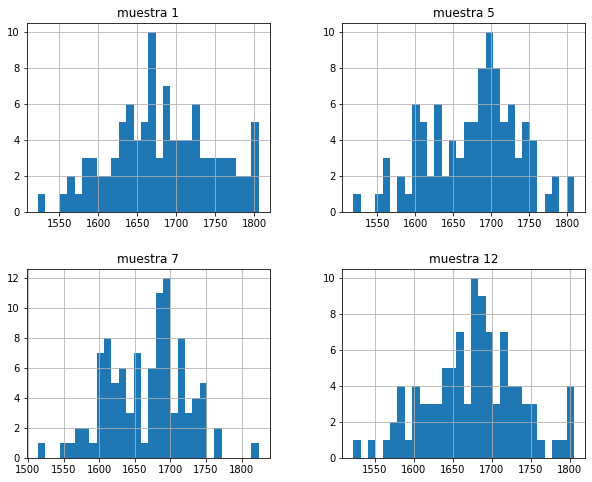

In [8]:
muestras_alturas_hombres[['muestra '+str(i) for i in [1, 5, 7, 12] ]].hist(figsize = (10,8), bins=30)
plt.show()

## Distribución de los errores

In [10]:
medias_altura = muestras_alturas_hombres.mean()
errores_altura = medias_altura - mu
print('la media poblacional es:', mu)
pd.DataFrame( {'Media':medias_altura,'Error':errores_altura })

la media poblacional es: 1675


,Media,Error
muestra 1,1682.832741,7.832741
muestra 2,1662.307630,-12.692370
muestra 3,1677.511937,2.511937
muestra 4,1680.169266,5.169266
muestra 5,1677.711265,2.711265
...,...,...
muestra 4996,1677.007618,2.007618
muestra 4997,1680.418571,5.418571
muestra 4998,1679.785982,4.785982
muestra 4999,1670.229580,-4.770420


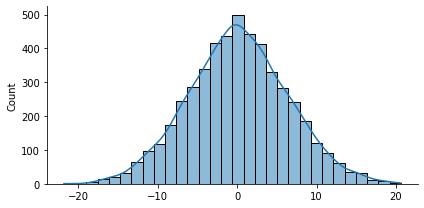

In [11]:
sns.displot(errores_altura, kde= True,  bins=30,  height=3, aspect=2)
plt.show()

In [12]:
def distribucion_errores(n, m):
    '''n: tamaño de muestra
     m: número de muestras'''
    mu, sigma = 1675, 62.8 
    muestras_alturas = pd.DataFrame(
        {'muestra '+str(i):np.random.normal(mu, 
                                            sigma, 
                                            n) for i in  range(1, m +1)})
    errores_altura = muestras_alturas.mean()- mu

    sns.displot(errores_altura, kde=True, bins=30,  height=3, aspect=2)
    plt.show()

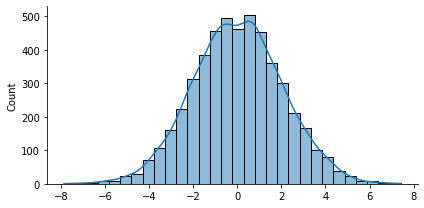

In [14]:
distribucion_errores(n= 1000, m=5000)

# Distribución Bernoulli

#### Preprocesar libro y obtener probabilidades de los caracteres 

In [15]:
#Cargar csv con distribución de probabilidad de letras
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')

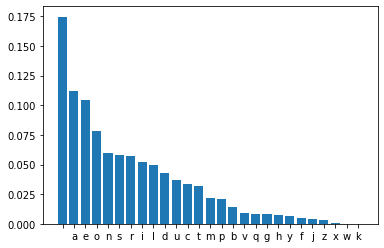

In [16]:
Ley_P_letras=Ley_P_letras.sort_values('probabilidad', ascending=False)
plt.bar(Ley_P_letras['caracter'], Ley_P_letras['probabilidad'] )
plt.show()

In [17]:
Ley_P_letras

,caracter,probabilidad
0,,0.174719
1,a,0.111833
5,e,0.104264
15,o,0.078457
14,n,0.059378
19,s,0.058194
18,r,0.056789
9,i,0.052305
12,l,0.049421
4,d,0.043164


2.  Distribución de caracteres por tipo

P(vocal) =  0.38405272562528125


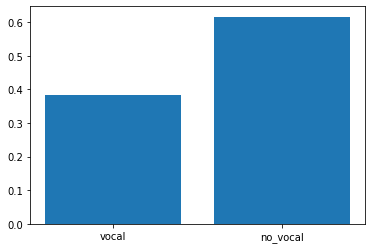

In [18]:
# Distribución bernoulli de obener una vocal

filtro_vocales = Ley_P_letras.caracter.isin(list('aeiou'))
P = Ley_P_letras[filtro_vocales]['probabilidad'].sum()
plt.bar(['vocal','no_vocal'],[P, 1-P])
print('P(vocal) = ', P)
plt.show()

### Obtener muestras

In [19]:
#Leer libro
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez', 'Cien años de soledad','EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']
libro =  borrar_elementos(libro, borrar) 
libro_limpio = limpiar_texto(libro)

In [20]:
n = 300 # tamaño de la muestra
m = 50000 # número de muestras

muestrasTexto = pd.Series(
    {'muestra '+str(i): "".join(random.sample(libro_limpio, n)) for i in range(m)})

muestrasTexto

muestra 0        ndebsds ouen tsic  aocndoa nioa ainst dhocere ...
muestra 1        dtoo oslo  p eereu moirevoeesnd rdsrb aeyaddod...
muestra 2        dl huvoone asnqa d garzspax et rdoeredd is  le...
muestra 3        dlvedsasnaa elcu e l et  darp cj aeeantosr nrm...
muestra 4        lguozabsio  joaobdaeuulc asermd bten visalnppe...
                                       ...                        
muestra 49995    pammslcem ip ralaat deydad ca sveeadcsa teiida...
muestra 49996    ioariderttapmmemlonnalee aen ueoeeag sadlo leu...
muestra 49997    saseu imaesrlamrodta so eraciqaialeleooai duoa...
muestra 49998    edane r ep c a  treonierolet r  mtsesroldzmocn...
muestra 49999      cp nanm nm chedaaa ntol rtppuencra eeer a e ...
Length: 50000, dtype: object

In [21]:
p_vocal = muestrasTexto.apply(cuenta_vocales)/n
errores_vocales = P - p_vocal
pd.DataFrame( {'Media':p_vocal,'Error':errores_vocales})

,Media,Error
muestra 0,0.380000,0.004053
muestra 1,0.410000,-0.025947
muestra 2,0.383333,0.000719
muestra 3,0.396667,-0.012614
muestra 4,0.410000,-0.025947
...,...,...
muestra 49995,0.373333,0.010719
muestra 49996,0.383333,0.000719
muestra 49997,0.383333,0.000719
muestra 49998,0.396667,-0.012614


### Distribución de cada muestra

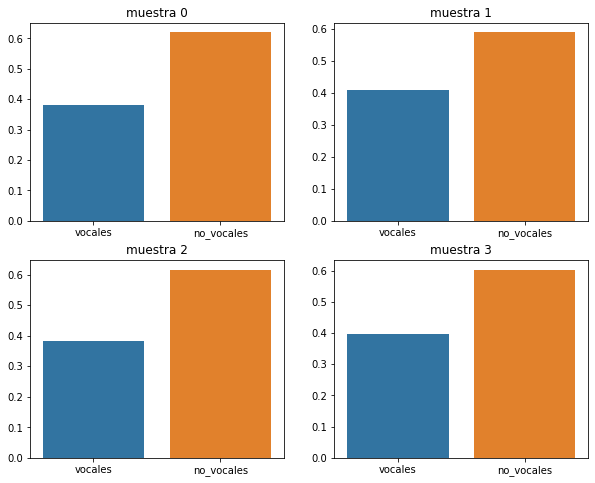

In [22]:
fig, ax = plt.subplots (2, 2, figsize= (10, 8))

for i, subplot in zip(range(4), ax.flatten()):
  x = ['vocales','no_vocales']
  y = [p_vocal['muestra '+str(i)],  1-p_vocal['muestra '+str(i)] ]
  titulo='muestra '+str(i)
  sns.barplot(x=x,y=y, ax=subplot).set(title=titulo)
plt.show()

### Distribución de los errores

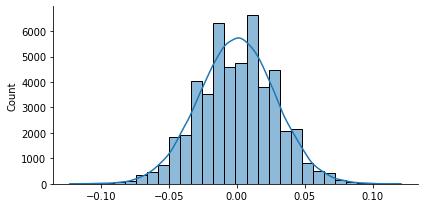

In [23]:
sns.displot(errores_vocales, kde= True,  bins=30,  height=3, aspect=2)
plt.show()

# Distribución exponencial

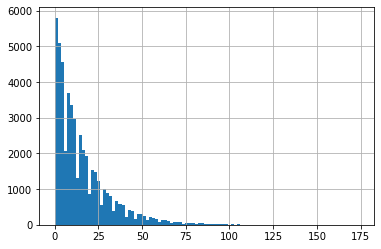

In [24]:
CaracteresAntesdeN = pd.Series(muestrasTexto.apply(cuenta_caracteres_antes_de_n))
CaracteresAntesdeN.hist(figsize=(6,4),bins=100)
plt.show()

In [25]:
CaracteresAntesdeN.mean()

15.83848

**Ejemplos de fenómenos con distribución exponencial:**
- Valores máximos de precipitación diaria
- Compras efectuadas por visitantes en página web
- Tiempo para que se produzca un fallo


¿Qué otros??

### Obtener muestras

In [26]:
n = 300 # tamaño de la muestra
m = 500 # número de muestras
muestras_exp=pd.DataFrame(
    {'muestra '+str(i): CaracteresAntesdeN.sample(n).values for i in range(1, m+1)}
)
muestras_exp

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,muestra 11,muestra 12,muestra 13,muestra 14,muestra 15,muestra 16,muestra 17,muestra 18,muestra 19,muestra 20,muestra 21,muestra 22,muestra 23,muestra 24,muestra 25,muestra 26,muestra 27,muestra 28,muestra 29,muestra 30,muestra 31,muestra 32,muestra 33,muestra 34,muestra 35,muestra 36,muestra 37,muestra 38,muestra 39,muestra 40,...,muestra 461,muestra 462,muestra 463,muestra 464,muestra 465,muestra 466,muestra 467,muestra 468,muestra 469,muestra 470,muestra 471,muestra 472,muestra 473,muestra 474,muestra 475,muestra 476,muestra 477,muestra 478,muestra 479,muestra 480,muestra 481,muestra 482,muestra 483,muestra 484,muestra 485,muestra 486,muestra 487,muestra 488,muestra 489,muestra 490,muestra 491,muestra 492,muestra 493,muestra 494,muestra 495,muestra 496,muestra 497,muestra 498,muestra 499,muestra 500
0,1,36,2,12,8,27,37,2,43,4,12,43,5,8,23,5,19,53,34,0,1,7,29,6,26,12,0,1,40,0,8,16,3,19,106,34,2,14,9,14,...,12,80,21,10,24,3,8,3,6,11,9,64,22,24,11,104,5,0,41,14,24,1,19,22,2,16,52,5,8,6,6,3,13,33,18,5,11,54,5,6
1,7,0,3,3,33,17,25,73,3,66,48,27,12,0,2,14,20,27,3,34,14,6,17,2,4,26,1,12,3,15,4,29,10,34,6,15,8,26,6,26,...,19,16,21,6,2,10,4,12,37,7,9,21,4,19,25,3,5,11,3,11,8,14,19,19,4,75,2,3,1,2,37,32,11,1,1,26,60,14,2,21
2,23,24,5,2,8,21,2,23,3,32,7,4,22,4,44,8,7,3,1,22,7,8,19,7,78,5,16,4,11,14,5,21,26,18,11,6,2,5,0,15,...,20,5,20,53,16,11,14,21,45,6,21,7,37,39,10,1,7,9,22,19,41,4,25,16,26,0,6,1,18,4,31,34,8,3,17,22,6,8,10,18
3,6,1,4,28,13,20,9,17,16,42,7,5,1,1,20,12,4,1,4,6,16,5,30,3,0,0,32,14,28,9,17,9,14,24,7,12,1,37,0,46,...,26,3,6,1,0,68,53,6,7,6,14,13,12,6,7,12,1,73,4,18,47,24,5,0,2,7,4,36,3,17,17,10,0,19,11,11,19,5,4,25
4,0,13,12,4,2,36,8,6,3,29,1,21,2,33,4,4,9,4,2,37,1,15,5,5,1,33,2,38,43,0,2,50,6,15,15,20,19,3,4,59,...,18,34,51,20,42,4,31,40,26,36,15,0,10,0,2,1,21,2,78,16,4,19,4,34,4,17,5,0,10,2,4,10,40,4,19,17,6,1,17,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,58,10,20,4,20,14,30,13,0,12,26,2,3,6,0,19,23,0,9,16,23,4,25,11,3,19,19,0,10,12,17,34,33,18,25,0,5,2,27,...,13,54,15,31,6,0,22,4,2,6,24,2,50,9,3,11,4,41,0,12,26,13,0,4,16,5,5,9,25,10,20,19,27,1,3,4,6,65,14,5
296,8,12,8,5,37,57,3,33,38,48,12,12,1,3,4,6,52,0,5,18,5,0,3,6,11,13,4,58,1,7,2,48,10,34,5,29,1,9,8,10,...,1,3,49,8,1,14,44,27,11,2,0,16,4,15,2,9,29,5,9,47,15,27,34,8,0,29,8,3,2,18,29,16,30,20,2,35,4,3,18,6
297,4,34,3,14,15,13,3,33,46,31,2,41,3,0,15,24,17,5,16,12,20,45,5,96,1,13,9,17,6,15,0,1,4,68,2,17,0,3,23,24,...,39,3,2,13,5,15,15,11,35,16,14,5,24,4,50,38,47,3,17,53,5,12,25,35,0,5,6,11,3,13,3,4,43,2,14,53,40,0,50,6
298,16,9,1,37,42,0,1,21,6,6,21,5,9,6,15,39,40,1,9,23,18,9,24,71,10,34,0,1,4,7,15,40,30,7,5,17,0,9,22,3,...,9,19,39,11,4,21,3,6,20,8,17,11,22,12,33,8,21,1,10,9,31,19,10,16,28,8,9,0,9,28,13,5,44,6,41,0,10,26,3,9


### Distribución de cada muestra

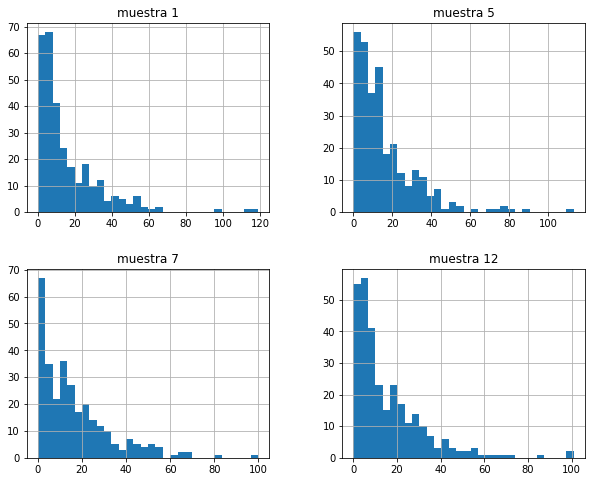

In [27]:
muestras_exp[['muestra '+str(i) for i in [1, 5, 7, 12] ]].hist(figsize = (10,8),
                                                               bins=30)
plt.show()

In [28]:
medias_exp = muestras_exp.mean()
errores_exp = medias_exp - CaracteresAntesdeN.mean()
print('la media poblacional es:', CaracteresAntesdeN.mean())
pd.DataFrame( {'Media':medias_exp,'Error':errores_exp })

la media poblacional es: 15.83848


,Media,Error
muestra 1,15.163333,-0.675147
muestra 2,15.363333,-0.475147
muestra 3,14.536667,-1.301813
muestra 4,15.140000,-0.698480
muestra 5,16.143333,0.304853
...,...,...
muestra 496,16.133333,0.294853
muestra 497,15.500000,-0.338480
muestra 498,16.346667,0.508187
muestra 499,16.203333,0.364853


### Distribución de los errores

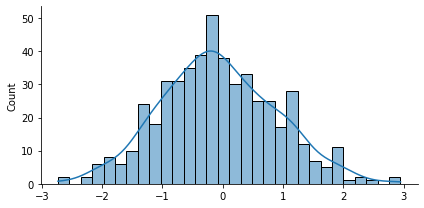

In [29]:
sns.displot(errores_exp, kde= True,  bins=30,  height=3, aspect=2)
plt.show()



https://seeing-theory.brown.edu/probability-distributions/index.html

